In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("archive/cnbc_news.csv")

df = df[["title", "published_at", "short_description"]]
df = df.rename(columns={"title": "Headlines", 'published_at': "Time", "short_description": "Description"})

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

df['Time'] = df['Time'].apply(lambda x: x.replace(tzinfo=None))

In [3]:
df.head(10)

,Headlines,Time,Description
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29 17:09:39,"This is the daily notebook of Mike Santoli, CN..."
1,My take on the early Brexit winners and losers,2016-06-24 13:50:48,This commentary originally ran on Facebook. Bo...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25 13:29:45,"In spring, ambitious reforms began in Italy. U..."
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22 19:49:03,The US government is increasingly likely to co...
4,Trump: 'Mission accomplished' on 'perfectly ex...,2018-04-14 14:59:04,NaN
5,Chevron CEO Watson says he supports Trump on t...,2017-03-07 23:07:14,Chevron Chief Executive John Watson told CNBC ...
6,22. Hexadite,2017-02-28 11:00:37,"Founders: Eran Barak, Barak Klinghofer (chief ..."
7,European stocks close higher on supportive Fed...,2020-12-17 06:08:38,LONDON — European stocks closed higher on Thur...
8,"Fewer investors have a 'fear of missing out,' ...",2019-07-28 21:00:47,Oppenheimer Asset Management's John Stoltzfus ...
9,Morgan Stanley Tries to Stave Off Ratings Cut,2012-04-05 06:53:57,"James Gorman, Morgan Stanley’s chief executive..."


In [4]:
df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [5]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(625, 1)


,Headlines
0,Santoli’s Wednesday market notes: Could Septem...
1,My take on the early Brexit winners and losers
2,Europe&#039;s recovery depends on Renzi&#039;s...
3,US Moves Closer to Becoming A Major Shareholde...
4,Trump: 'Mission accomplished' on 'perfectly ex...


In [6]:
first_row = df.head(1)

last_row = df. tail(1)

In [7]:
# Filter data within the specified time frame
start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2020-07-31')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [8]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def sentiment_binning(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)

df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)

C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_16580\2350247784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)
C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_16580\2350247784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)


<Figure size 1200x600 with 0 Axes>

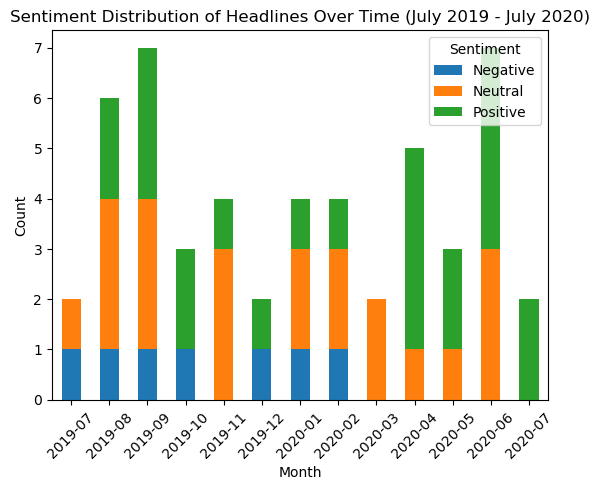

In [9]:
# Group by month and calculate sentiment distribution
df_sentiment_by_month = df_filtered.groupby(df_filtered['Time'].dt.strftime('%Y-%m'))['Sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment distribution over time
plt.figure(figsize=(12, 6))
df_sentiment_by_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Headlines Over Time (July 2019 - July 2020)')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()

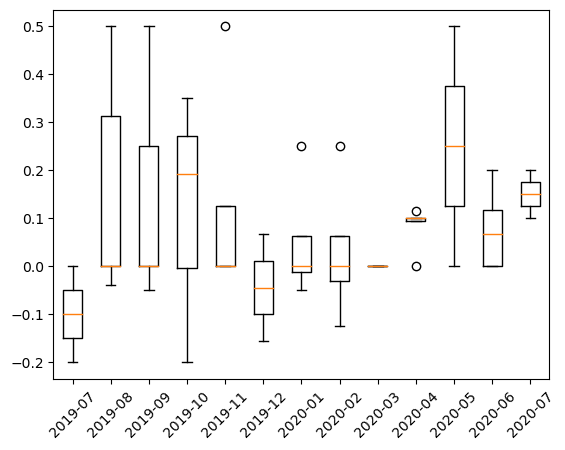

In [10]:
sentiment_score_data = df_filtered[["Time", "Sentiment Score"]]
sentiment_score_data.set_index("Time", inplace=True)

sentiment_score_data_by_month = sentiment_score_data.resample("M")['Sentiment Score'].apply(list)

numpy_sentiment_score_data_by_month = sentiment_score_data_by_month.to_numpy()

raw_dates = sentiment_score_data_by_month.index.tolist()
formatted_dates = []

for date in raw_dates:
    formatted_dates.append(date.strftime("%Y-%m"))

plt.boxplot(numpy_sentiment_score_data_by_month)
plt.xticks([x for x in range(1, 14)], formatted_dates, rotation=45)
plt.show()

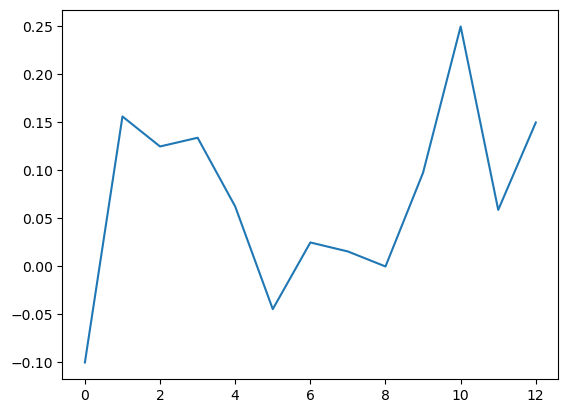

In [11]:
avg_sentiment = []

for item in numpy_sentiment_score_data_by_month:
    arr = np.array(item)
    fst_qrtl = np.percentile(arr, 25)
    thrd_qrtl = np.percentile(arr, 75)

    avg_sentiment.append((fst_qrtl + thrd_qrtl) / 2)

plt.plot(avg_sentiment)
plt.show()

In [12]:
news_sentiment_df = pd.DataFrame({
    "Sentiment": avg_sentiment,
    "Date": formatted_dates
})

news_sentiment_df.to_csv("./analysis result data/cnbc_news_sentiment_data.csv")